In [ ]:
install.packages('forecast', dependencies = TRUE) #colab'de python dosyasını r için uygun hale getirdikten sonra forecast library'sini install edelim

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘x13binary’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’




In [ ]:
path="/content/co2a0000364.rd.000"
data=read.table(path)
head(data, 10)

,V1,V2,V3,V4
,<int>,<chr>,<int>,<dbl>
1,0,FP1,0,-8.921
2,0,FP1,1,-8.433
3,0,FP1,2,-2.574
4,0,FP1,3,5.239
5,0,FP1,4,11.587
6,0,FP1,5,14.028
7,0,FP1,6,11.587
8,0,FP1,7,6.704
9,0,FP1,8,1.821


In [ ]:
time_series_var <- ts(data[, c("V4")])
time_series_var <- ts(as.vector(time_series_var)) #datayı vektör/zaman serisine uygun hale getirelim
#p-value bulmak için augmented Dickey-Fuller test uygulayalım
adf.test(time_series_var)

Warning message in adf.test(time_series_var):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  time_series_var
Dickey-Fuller = -11.412, Lag order = 25, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
#p-valuenun 0,05'den küçük olması AR modelinin istatistiksel olarak anlamlı olduğunu gösterir
#bu yüzden differencing(fark alma) işlemine gerek bulunmamakta

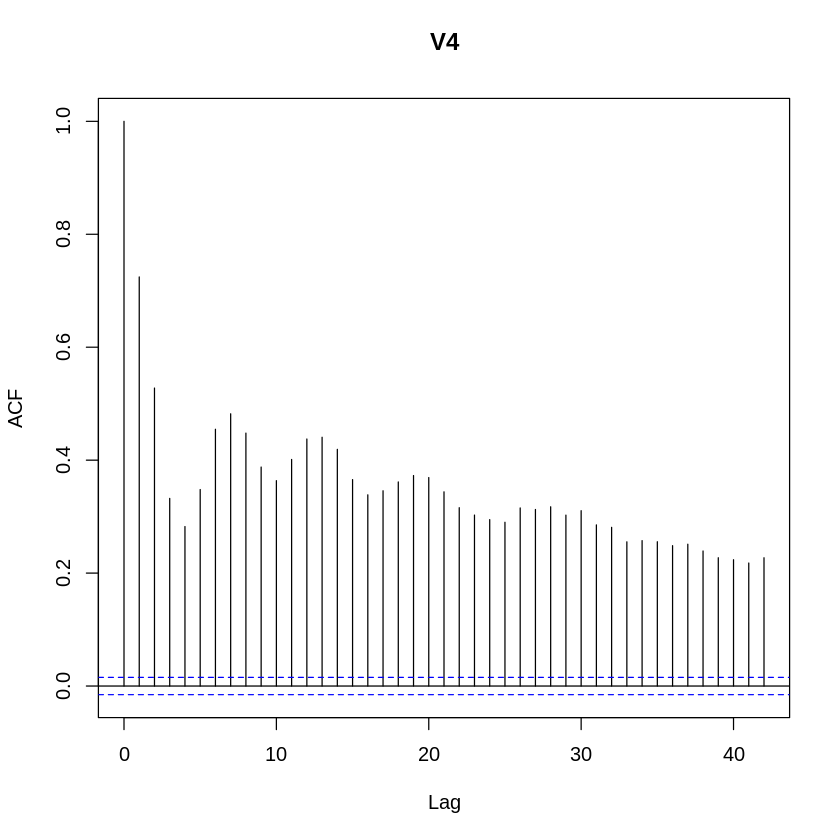

In [ ]:
acf(data[4]) #autocorrelation hesaplama

In [ ]:
filtered_data <- data[data$V2 == "FP1", "V4"]
filtered_data #örnek olarak FP1 tag'ine sahip row'ların V4 column'undaki değerleri

[1]  -8.921  -8.433  -2.574   5.239  11.587  14.028  11.587   6.704   1.821
 [10]  -1.109  -2.085  -1.597   0.356   2.309   2.797   2.309   0.356  -0.132
 [19]  -0.132   0.356   0.844   1.333   2.797   6.215   9.633  10.610   6.704
 [28]  -0.621  -5.992  -6.480  -1.597   4.262   7.680   5.727   1.821   0.356
 [37]   3.286   9.145  14.028  13.540   8.169   1.821  -1.109   2.309   9.633
 [46]  16.469  18.911  15.004   8.169   2.309   1.333   4.262   9.145  11.587
 [55]   9.633   5.727   3.286   4.751  10.122  15.004  14.516   8.169  -1.109
 [64]  -8.433 -10.386  -7.456  -3.062   0.356   0.844  -0.132  -2.085  -3.062
 [73]  -3.550  -3.062  -2.574  -2.574  -3.550  -5.503  -7.456  -7.945  -6.480
 [82]  -4.038  -1.597  -0.132  -0.132  -0.132   1.333   2.309   2.309   0.356
 [91]  -4.038  -8.433  -9.898  -8.921  -5.503  -2.574  -1.597  -2.574  -4.038
[100]  -4.527  -4.527  -5.503  -7.945 -11.363 -13.316 -11.363  -7.456  -3.062
[109]  -1.597  -2.085  -3.550  -3.550  -2.574  -2.574  -4.038  -5.992  -5.503
[118]  -1.597   2.797   5.727   6.215   4.262   3.774   5.239   8.657   9.633
[127]   6.704   2.309  -0.132   1.333   6.215  10.610  11.098   6.215  -0.132
[136]  -4.038  -3.062   1.333   5.727   7.192   4.751   1.821   0.844   3.286
[145]   6.704   7.192   3.774  -0.621  -2.574  -0.621   4.262   8.169   8.169
[154]   5.239   1.333  -0.132   1.821   5.239   8.169   8.169   7.192   6.215
[163]   6.215   6.704   7.192   6.704   5.727   5.239   5.239   5.727   7.680
[172]  10.610  15.493  18.911  19.887  16.958  12.563   9.145   8.169  10.122
[181]  13.051  14.516  14.516  15.004  16.958  19.887  19.887  16.958  11.098
[190]   6.215   5.239   6.704   8.657   8.169   6.215   6.215  10.122  15.981
[199]  18.911  15.981   8.169   0.844  -1.597   1.821   7.192   8.657   7.192
[208]   4.262   4.262   6.704   8.169   7.192   4.262   3.286   5.727  10.610
[217]  14.516  14.028   9.633   5.727   4.262   5.727   7.192   7.192   5.727
[226]   4.751   6.704  10.610  13.051  13.051   9.633   6.704   6.704   8.657
[235]  10.610   9.145   4.751  -0.132  -2.574  -1.109   2.309   6.215   8.657
[244]  10.610  12.075  12.563  10.610   8.169   4.751   2.797   2.797   3.286
[253]   3.774   4.262   5.727   8.169

In [ ]:
library(forecast) #tüm tag'ler için auto arima fonksiyonu yardımıyla p,d,q değerlerini hesaplayalım
model1 <- auto.arima(data[data$V2 == "FP1", "V4"])
model2 <- auto.arima(data[data$V2 == "FP2", "V4"])
model3 <- auto.arima(data[data$V2 == "F7", "V4"])
model4 <- auto.arima(data[data$V2 == "F8", "V4"])
model5 <- auto.arima(data[data$V2 == "AF1", "V4"])
model6 <- auto.arima(data[data$V2 == "AF2", "V4"])
model7 <- auto.arima(data[data$V2 == "FZ", "V4"])
model8 <- auto.arima(data[data$V2 == "F4", "V4"])
model9 <- auto.arima(data[data$V2 == "F3", "V4"])
model10 <- auto.arima(data[data$V2 == "FC6", "V4"])
model11 <- auto.arima(data[data$V2 == "FC5", "V4"])
model12 <- auto.arima(data[data$V2 == "FC2", "V4"])
model13 <- auto.arima(data[data$V2 == "FC1", "V4"])
model14 <- auto.arima(data[data$V2 == "T8", "V4"])
model15 <- auto.arima(data[data$V2 == "T7", "V4"])
model16 <- auto.arima(data[data$V2 == "CZ", "V4"])
model17 <- auto.arima(data[data$V2 == "C3", "V4"])
model18 <- auto.arima(data[data$V2 == "C4", "V4"])
model19 <- auto.arima(data[data$V2 == "CP5", "V4"])
model20 <- auto.arima(data[data$V2 == "CP6", "V4"])
model21 <- auto.arima(data[data$V2 == "CP1", "V4"])
model22 <- auto.arima(data[data$V2 == "CP2", "V4"])
model23 <- auto.arima(data[data$V2 == "P3", "V4"])
model24 <- auto.arima(data[data$V2 == "P4", "V4"])
model25 <- auto.arima(data[data$V2 == "PZ", "V4"])
model26 <- auto.arima(data[data$V2 == "P8", "V4"])
model27 <- auto.arima(data[data$V2 == "P7", "V4"])
model28 <- auto.arima(data[data$V2 == "PO2", "V4"])
model29 <- auto.arima(data[data$V2 == "PO1", "V4"])
model30 <- auto.arima(data[data$V2 == "O2", "V4"])
model31 <- auto.arima(data[data$V2 == "O1", "V4"])
model32 <- auto.arima(data[data$V2 == "X", "V4"])
model33 <- auto.arima(data[data$V2 == "AF7", "V4"])
model34 <- auto.arima(data[data$V2 == "AF8", "V4"])
model35 <- auto.arima(data[data$V2 == "F5", "V4"])
model36 <- auto.arima(data[data$V2 == "F6", "V4"])
model37 <- auto.arima(data[data$V2 == "FT7", "V4"])
model38 <- auto.arima(data[data$V2 == "FT8", "V4"])
model39 <- auto.arima(data[data$V2 == "FPZ", "V4"])
model40 <- auto.arima(data[data$V2 == "FC4", "V4"])
model41 <- auto.arima(data[data$V2 == "FC3", "V4"])
model42 <- auto.arima(data[data$V2 == "C6", "V4"])
model43 <- auto.arima(data[data$V2 == "C5", "V4"])
model44 <- auto.arima(data[data$V2 == "F2", "V4"])
model45 <- auto.arima(data[data$V2 == "F1", "V4"])
model46 <- auto.arima(data[data$V2 == "TP8", "V4"])
model47 <- auto.arima(data[data$V2 == "TP7", "V4"])
model48 <- auto.arima(data[data$V2 == "AFZ", "V4"])
model49 <- auto.arima(data[data$V2 == "CP3", "V4"])
model50 <- auto.arima(data[data$V2 == "CP4", "V4"])
model51 <- auto.arima(data[data$V2 == "P5", "V4"])
model52 <- auto.arima(data[data$V2 == "P6", "V4"])
model53 <- auto.arima(data[data$V2 == "C1", "V4"])
model54 <- auto.arima(data[data$V2 == "C2", "V4"])
model55 <- auto.arima(data[data$V2 == "PO7", "V4"])
model56 <- auto.arima(data[data$V2 == "PO8", "V4"])
model57 <- auto.arima(data[data$V2 == "FCZ", "V4"])
model58 <- auto.arima(data[data$V2 == "POZ", "V4"])
model59 <- auto.arima(data[data$V2 == "OZ", "V4"])
model60 <- auto.arima(data[data$V2 == "P2", "V4"])
model61 <- auto.arima(data[data$V2 == "P1", "V4"])
model62 <- auto.arima(data[data$V2 == "CPZ", "V4"])
model63 <- auto.arima(data[data$V2 == "nd", "V4"])
model64 <- auto.arima(data[data$V2 == "Y", "V4"])

In [ ]:
model1 #örnek olarak "FP1" tag'i için auto arima sonuçları

Series: data[data$V2 == "FP1", "V4"] 
ARIMA(5,1,3) 

Coefficients:
         ar1      ar2     ar3      ar4     ar5      ma1     ma2      ma3
      2.4444  -3.0955  2.0438  -0.6664  0.0005  -1.0496  1.0764  -0.6194
s.e.  0.1100   0.2533  0.3372   0.2358  0.0933   0.0908  0.0614   0.0951

sigma^2 = 0.5699:  log likelihood = -290.03
AIC=598.07   AICc=598.8   BIC=629.94

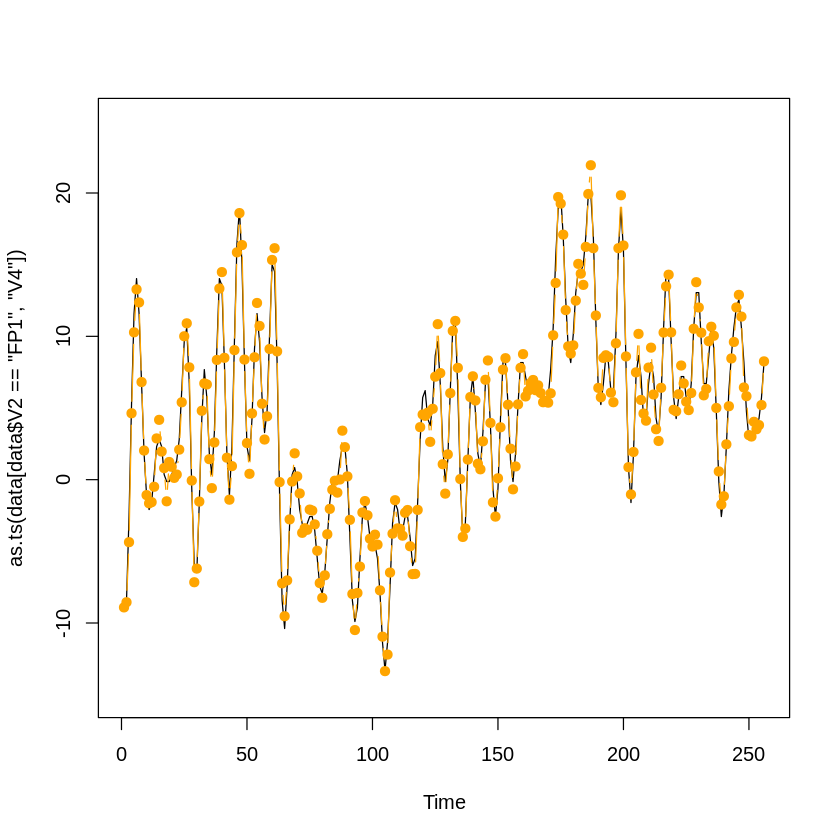

In [ ]:
plot(as.ts(data[data$V2 == "FP1", "V4"]), ylim=c(-15,25))
lines(fitted(model1),type = "b", col="orange", pch = 19) #örnek olarak oluşturulan model1'in training data ile örtüşmesi

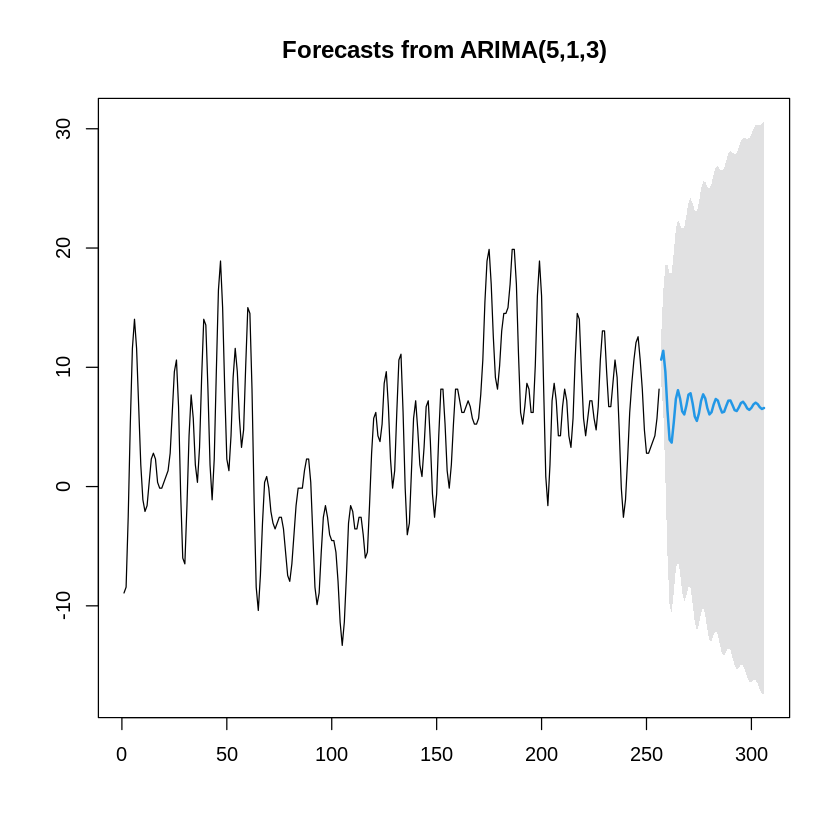

In [ ]:
future_val <- forecast(model1, h=50, level=c(99)) #confidence level yüzde 99
plot(forecast(future_val)) #+50 time için prediction (model1 [FP1 tag için örnek])

In [ ]:
future_val$mean #gelecekte tahmin edilen değerler

A Time Series:
 [1] 10.642867 11.386636  9.614197  6.408794  3.932861  3.686129  5.377627
 [8]  7.350989  8.082721  7.383066  6.313541  6.046270  6.787083  7.705998
[15]  7.825152  6.963558  5.872897  5.505479  6.143638  7.186039  7.734122
[22]  7.395668  6.576756  6.048521  6.235793  6.880852  7.343884  7.213296
[29]  6.654070  6.207902  6.273234  6.758357  7.202688  7.217685  6.826646
[36]  6.409231  6.334158  6.633780  7.006053  7.113096  6.884563  6.555730
[43]  6.430191  6.603009  6.894329  7.033923  6.910062  6.655351  6.507400
[50]  6.588179

In [ ]:
arimaorder(model1)

p d q 
5 1 3

**Auto Arima ile Hesaplanan Sonuçlardan Tag'lerin p, d, q Value'larının Yazdırılması**

In [ ]:
cat(" p,d,q","\n",arimaorder(model1),"FP1\n",arimaorder(model2),"FP2\n",arimaorder(model3),"F7\n",arimaorder(model4),"F8\n",arimaorder(model5),"AF1\n",arimaorder(model6),"AF2\n",arimaorder(model7),"FZ\n",arimaorder(model8),"F4\n")
cat("",arimaorder(model9),"F3\n",arimaorder(model10),"FC6\n",arimaorder(model11),"FC5\n",arimaorder(model12),"FC2\n",arimaorder(model13),"FC1\n",arimaorder(model14),"T8\n",arimaorder(model15),"T7\n",arimaorder(model16),"CZ\n")
cat("",arimaorder(model17),"C3\n",arimaorder(model18),"C4\n",arimaorder(model19),"CP5\n",arimaorder(model20),"CP6\n",arimaorder(model21),"CP1\n",arimaorder(model22),"CP2\n",arimaorder(model23),"P3\n",arimaorder(model24),"P4\n")
cat("",arimaorder(model25),"PZ\n",arimaorder(model26),"P8\n",arimaorder(model27),"P7\n",arimaorder(model28),"PO2\n",arimaorder(model29),"PO1\n",arimaorder(model30),"O2\n",arimaorder(model31),"O1\n",arimaorder(model32),"X\n")
cat("",arimaorder(model33),"AF7\n",arimaorder(model34),"AF8\n",arimaorder(model35),"F5\n",arimaorder(model36),"F6\n",arimaorder(model37),"FT7\n",arimaorder(model38),"FT8\n",arimaorder(model39),"FPZ\n",arimaorder(model40),"FC4\n")
cat("",arimaorder(model41),"FC3\n",arimaorder(model42),"C6\n",arimaorder(model43),"C5\n",arimaorder(model44),"F2\n",arimaorder(model45),"F1\n",arimaorder(model46),"TP8\n",arimaorder(model47),"TP7\n",arimaorder(model48),"AFZ\n")
cat("",arimaorder(model49),"CP3\n",arimaorder(model50),"CP4\n",arimaorder(model51),"P5\n",arimaorder(model52),"P6\n",arimaorder(model53),"C1\n",arimaorder(model54),"C2\n",arimaorder(model55),"PO7\n",arimaorder(model56),"PO8\n")
cat("",arimaorder(model57),"FCZ\n",arimaorder(model58),"POZ\n",arimaorder(model59),"OZ\n",arimaorder(model60),"P2\n",arimaorder(model61),"P1\n",arimaorder(model62),"CPZ\n",arimaorder(model63),"nd\n",arimaorder(model64),"Y\n")

 p,d,q 
 5 1 3 FP1
 3 1 5 FP2
 5 1 5 F7
 5 0 2 F8
 5 1 2 AF1
 4 1 3 AF2
 2 1 5 FZ
 4 0 2 F4
 5 1 3 F3
 5 0 3 FC6
 5 1 3 FC5
 3 0 3 FC2
 2 1 5 FC1
 4 1 3 T8
 5 1 3 T7
 4 1 3 CZ
 0 0 1 C3
 5 1 2 C4
 0 1 2 CP5
 2 1 1 CP6
 3 1 2 CP1
 2 1 2 CP2
 4 1 3 P3
 3 1 2 P4
 2 1 3 PZ
 4 1 3 P8
 3 1 2 P7
 2 1 3 PO2
 4 1 3 PO1
 5 1 2 O2
 2 1 3 O1
 4 1 3 X
 4 1 3 AF7
 4 1 5 AF8
 4 1 3 F5
 5 0 2 F6
 5 1 5 FT7
 5 1 5 FT8
 4 1 4 FPZ
 4 1 3 FC4
 4 1 3 FC3
 5 1 3 C6
 4 1 3 C5
 3 1 2 F2
 3 1 2 F1
 3 1 4 TP8
 5 1 5 TP7
 3 1 5 AFZ
 5 1 4 CP3
 2 1 2 CP4
 4 1 3 P5
 4 1 2 P6
 3 1 1 C1
 1 1 1 C2
 1 0 1 PO7
 0 1 1 PO8
 2 1 3 FCZ
 3 1 2 POZ
 4 1 3 OZ
 2 1 3 P2
 3 1 2 P1
 2 1 2 CPZ
 5 1 3 nd
 4 1 3 Y
